
Time              |Activity 
:-----------------|:----------------------------------
04.2019 - 09.2019 | BSc thesis student and intern at **MPI-BGC**
09.2019 - 04.2021 | MSc Atmospheric and Climate Science at **ETH Zürich**
09.2020 - 03.2020 | MSc thesis at **Institute for Atmospheric and Climate Science**, ETHZ
05.2021 - present | Doctoral researcher at Physical-Meteorological Observatory Davos /World Radiation Center (**PMOD/WRC**)


# Solar radiation nowcasting using a Markov chain multi-model approach
**Xinyuan Hou, Kyriakoula Papachristopoulou, Yves-Marie Saint-Drenan and Stelios Kazadzis**

## Introduction

- global horizontal irradiance
- crucial for solar energy application
- objective: 
    - propose a hybrid approach using several forecast techniques
    - provide infomation about solar radiation availability in the next hour(s)
    - aid solar power corporations to schedule input distributions. 

## Data

- Copernicus Atmospheric Monitoring Service (CAMS)
- Cloud modification factor (CMF), defined as the ratio of GHI in all-sky condition to that in clear-sky conditions:

$$CMF = \frac{GHI}{GHI_{CS}}$$
    
    - CMF -> 0, the sky is cloudy
    - CMF = 1 , clear sky without clouds.

- time series with an interval of 15 minutes, 2004-02-01 to 2020-12-31
- 4 cities of different cloud conditions in Europe: 

City           | Coordinates
:--------------|:------------------
Athens         | 37.98° N, 23.72° E 
Bucharest      | 44.44° N, 26.08° E 
Berlin         | 52.52° N, 13.37° E
Helsinki       | 60.19° N, 24.93° E 

which are in descending order of long-term average CMF.

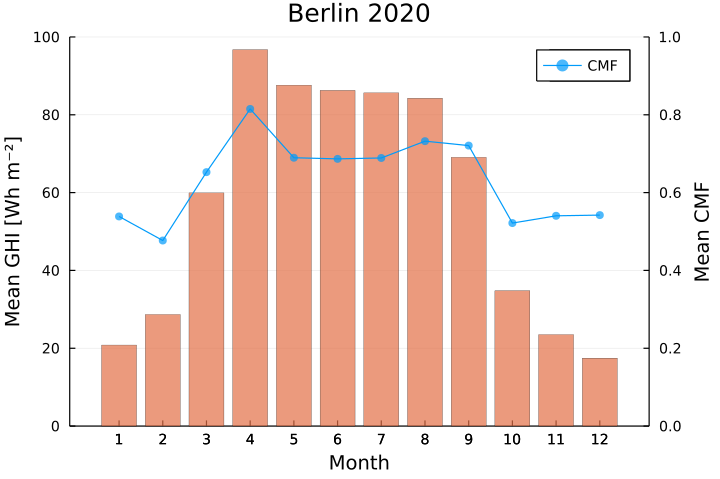

In [18]:
Fig. 1: Daily mean global horizontal irradiation (GHI) for each month (orange bars, left axis) and
monthly mean cloud modification factor (CMF, blue curves, right axis) for Berlin in 2020.

## Model & methods

### Quantitative metrics

![a](quantMetrics.png)

### Markov Chain

- describe transition process of CMF. The probability distri of the following state depends on its previous states. 
- solar rad derived CMF possesses Markov property
- lead time of the fcst is approx equal to temporal resolution of the model, here from 15 min to 60 min
- order of Markov process indicates num of previous obs on which the next state statistically depends.
    - e.g. a second order MC model approximates particular states at time t depending on states at times t-1 and t-2

#### State classification

- CMF btwn 0 and 1 => first discretize continuous variable to integer states
- choose the number of states/classes by std dev of bias 
- opt for 30 in order not to overfit
- each cls having same amount of data points

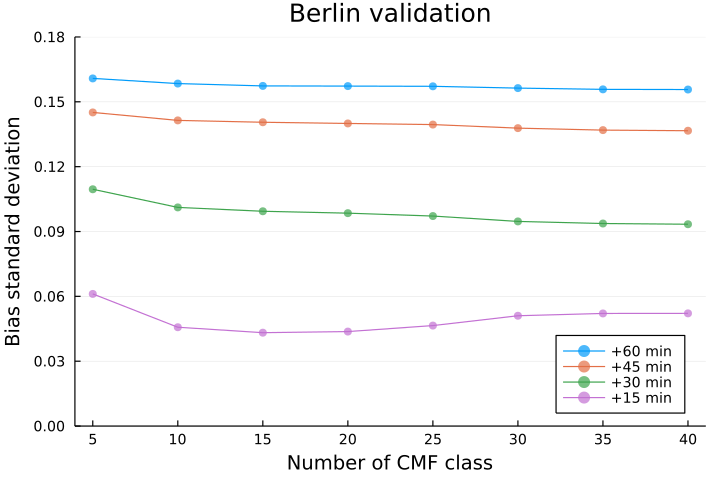

In [35]:
Fig. 2: Bias standard deviation of Markov chain (MC) model with different number of classes for
the validation set (2019) in Berlin.

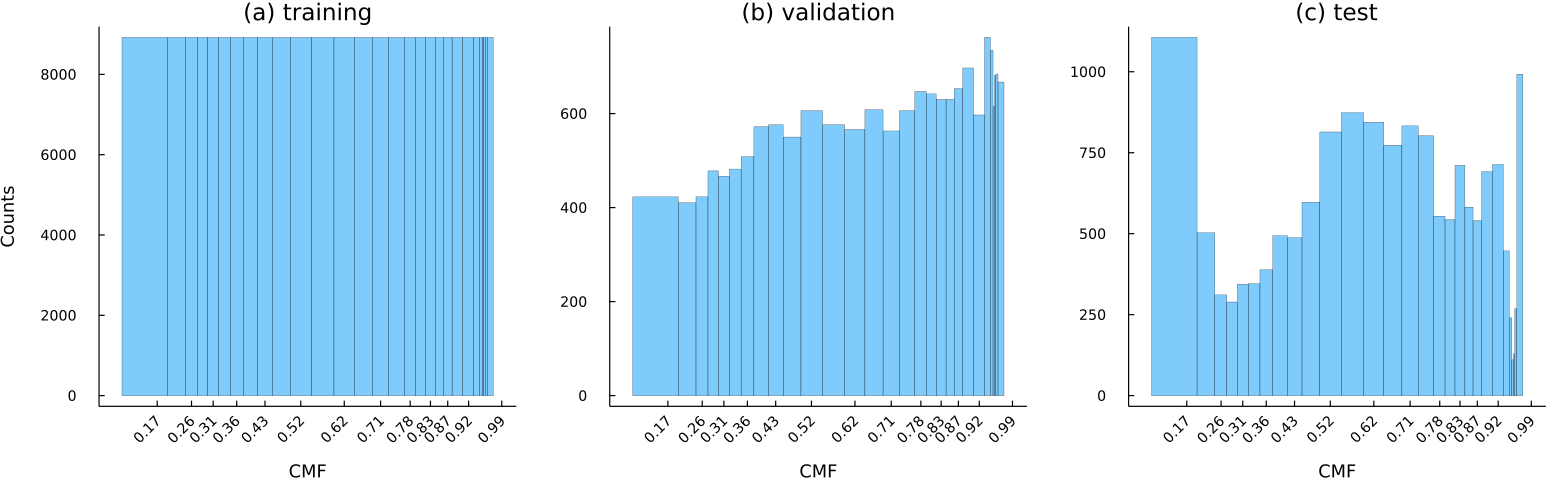

In [25]:
Fig. 3: Distribution of CMF class of three data sets in Berlin: (a) training set for 2004-2018, (b)
validation set for 2019 and (c) test set for 2020.
The validation and test sets inherit the classification from the training set, thus do not have equal number of data points in every class.

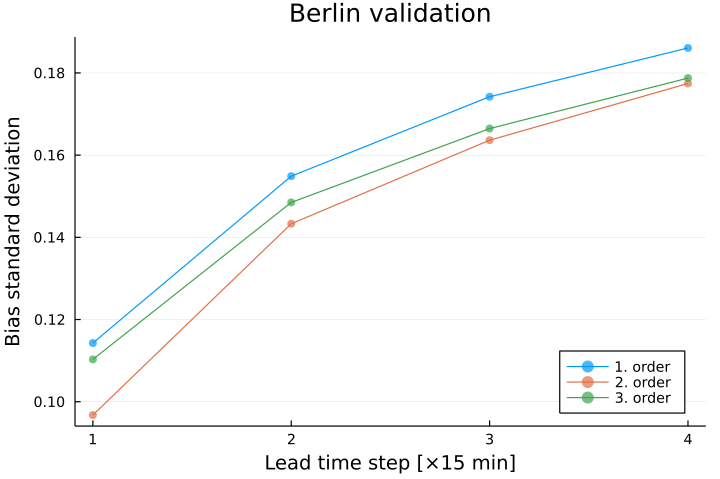

In [282]:
Fig. 4: Bias standard deviation of MC model of different orders for the validation set (2019) in
Berlin.

#### Transition matrix

- 2nd order Markov chain: initiate an `n²×n` matrix. 
- rows list all `n²` transition cases of states from the previous to the current time step., namely `1→1`, `1→2`, ..., `1→30`, `2→1`, ..., and `30→30`
- columns represent 30 possible states for the immediate time step 
- count the occurrence of each case to fill into the rows
- normalize transition matrix to ensure probabilities in each row sums to 1

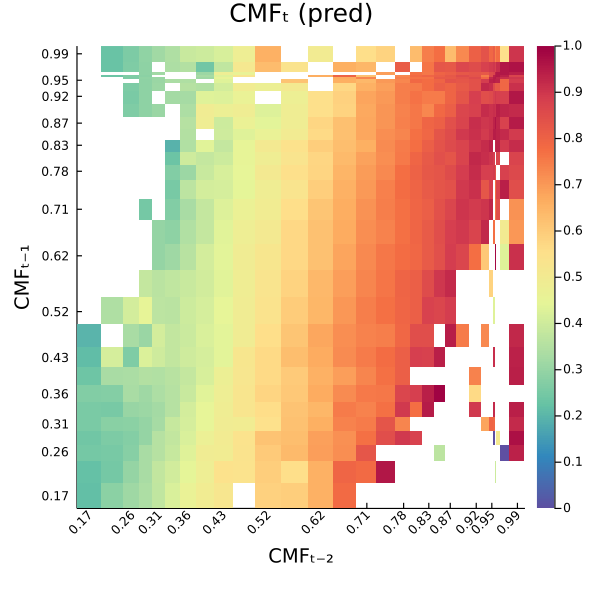

#### Temporal extrapolation

**Variant a**

- compute the prediction value by weighted mean at the specific row in the transition matrix
- Set to be CMF 1 to 4 time steps later

**Variant b**

- take 2 consecutive values from validation set as obser, predict next time step following var_a
- update latter obs and pred to be 2 new obs
- next 2 new obs would be from 2 predictions, and so on

Fig. 5: Diagram of two variants of temporal extrapolation during a one-hour time window from
9:00 to 10:00 in the MC model.

![te](MCvariants.png)

### Persistence approach

- Assume cloud state does not change from previous to current
$$CMF_t = CMF_{t-1}$$

### Neighbor inference

- extract neighboring cells from 8 directions, shift 0.1° long/lat
- exclude CMF > 0.95 corresp to sunny moments
- correlate them with CMF in center

- The highest correlation is with the cell to the west

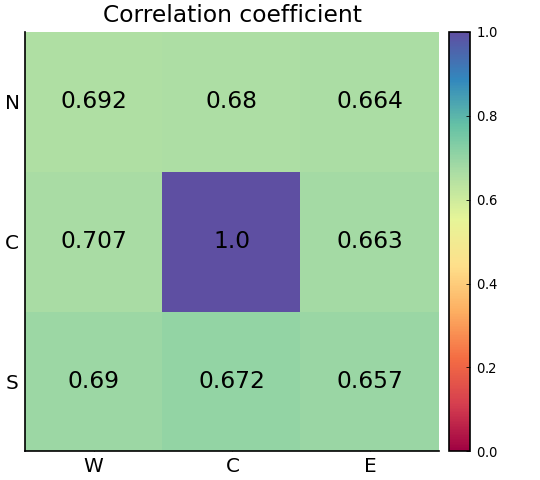

In [43]:
Fig. 6: Correlation coefficients of CMF in Berlin with its eight neighboring grid cells.

### Hybrid approach

- for time series of 2019, evaluate above methods by MAE and RMSE for all 30 CMF classes
- if the error by the certain approach is the smallest, adopt this approach for this specific CMF class
- apply this information on time series of 2020 by choosing the optimal approach for the next time step `t+1` based on the CMF class at the current time step `t`.

### GHI prediction

For the computation of all-sky GHI, we multiply clear-sky GHI provided by CAMS by predicted CMF values following different approaches: 

$$GHI = GHI_{CS} ∙ CMF$$

## Results

### CMF

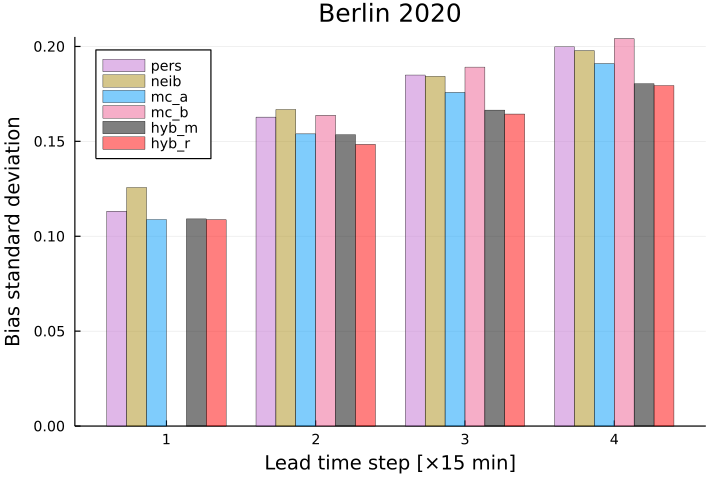

In [29]:
Fig. 7: Standard deviation of CMF prediction bias for Berlin. 

- hybrid approaches based on MAE or RMSE have smaller standard deviation of bias than the other approaches.

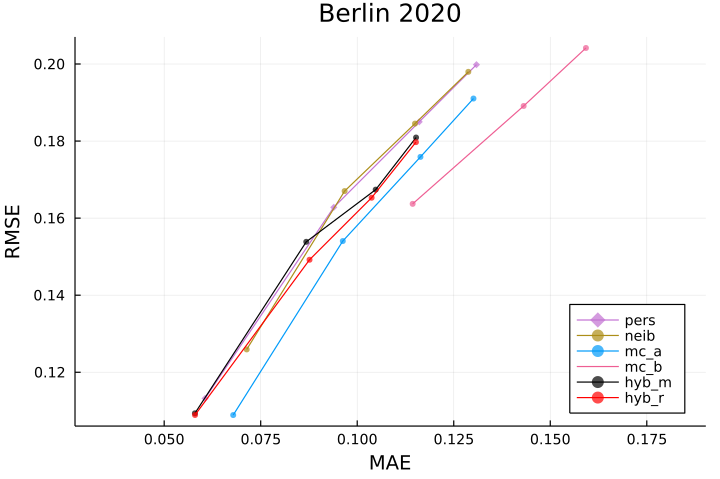

In [30]:
Fig. 8: Mean absolute error (MAE) versus root mean square error (RMSE) for Berlin. For one step
ahead (+1), the results for both mca and mcb are the same, but only Variant a is visualized to avoid
redundancy and/or overlapping. The same applies to the following figures.

- For 15 min ahead, the errors of the hybrid methods are very close. 
- From 30 min ahead on, the errors of the hybrid method based on RMSE are basically the same as of the MC prediction.

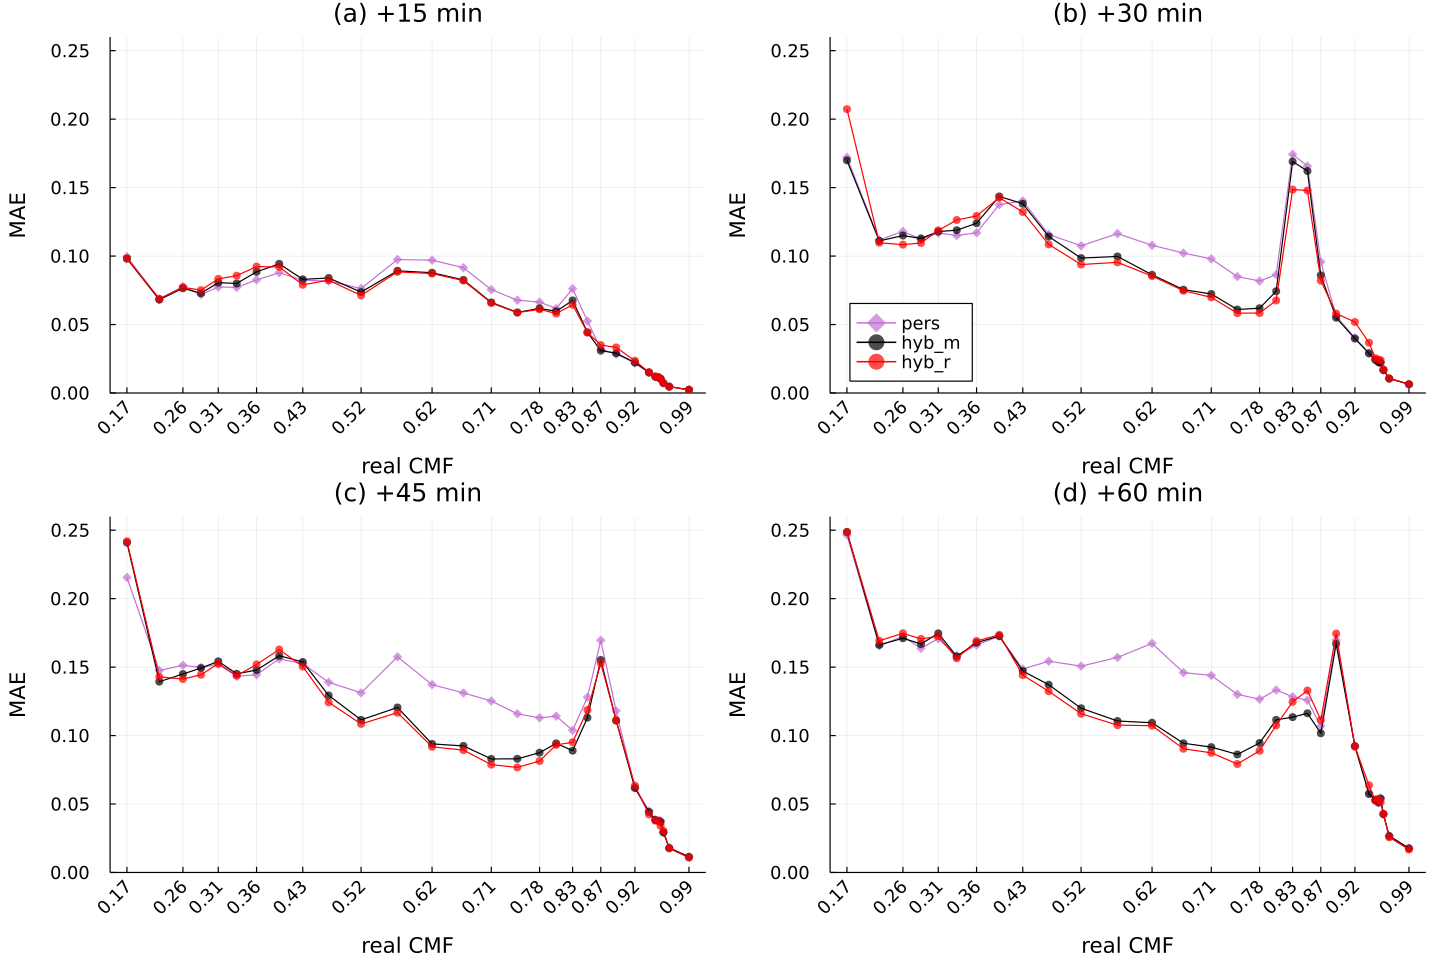

In [36]:
Fig. 9: MAE for each CMF class for (a) 15 minutes, (b) 30 minutes, (c) 45 minutes and (d) 60
minutes ahead in 2020 for Berlin. 

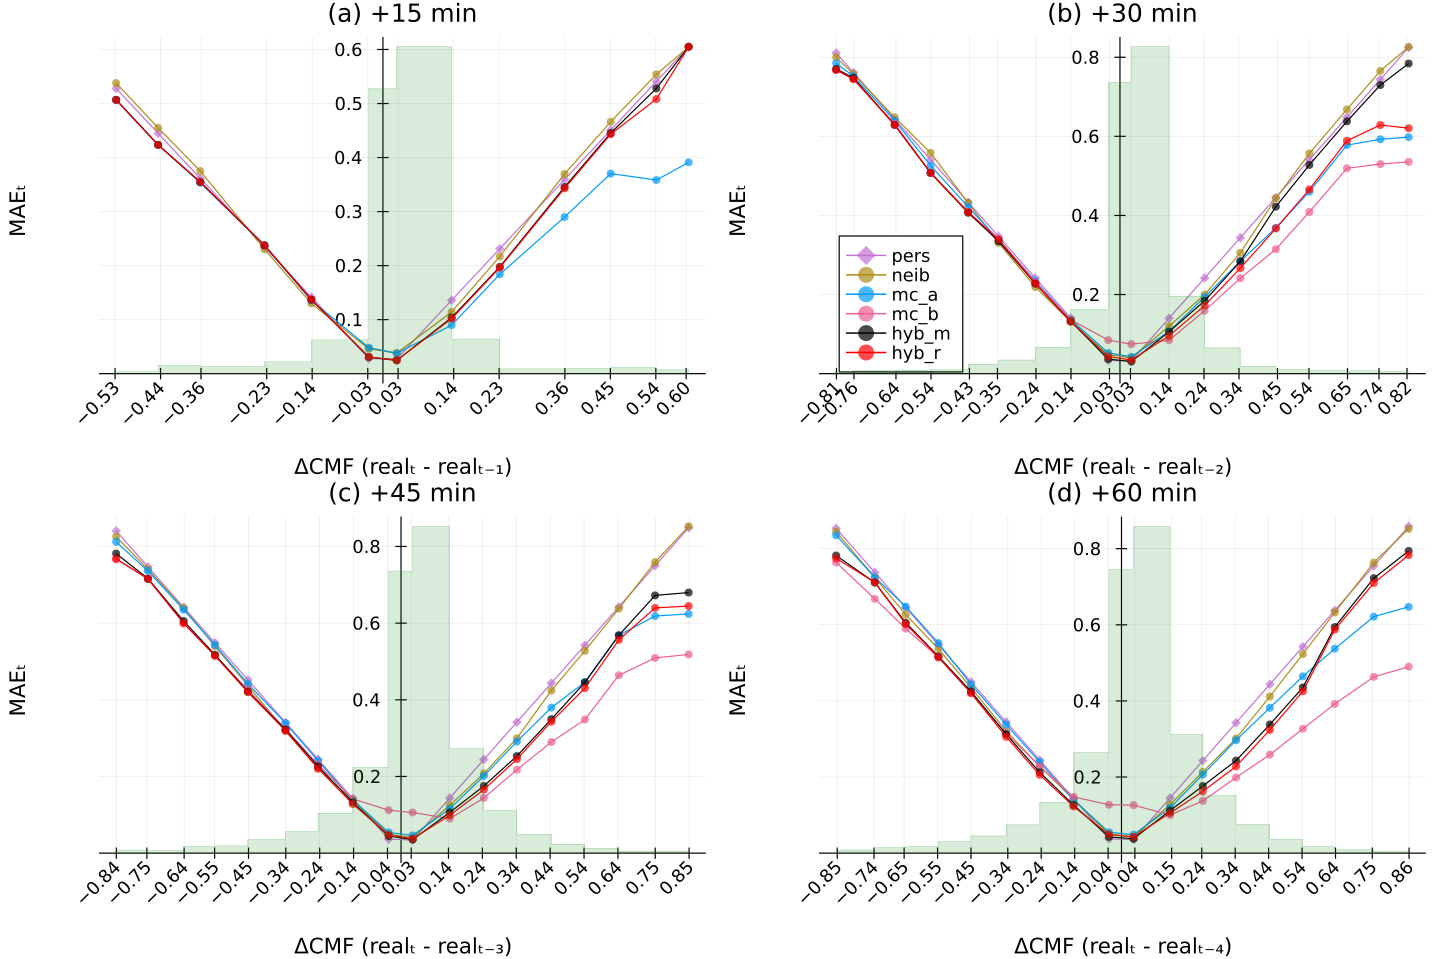

In [38]:
Fig. 10: MAE of CMF change for (a) 15 minutes, (b) 30 minutes, (c) 45 minutes and (d) 60 minutes
ahead for Berlin. The horizontal ticks are the means of every class of CMF change, where the change
classes are equally-spaced with an interval of 0.1, e.g., [-0.1, 0) and [0, 0.1). 

### GHI

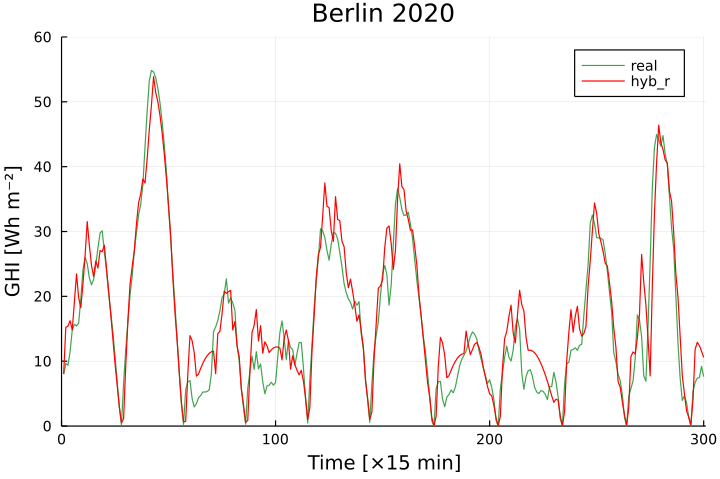

In [26]:
Fig. 11: Comparison of actual daily GHI by CAMS (green) and predicted with a lead time of 15
minutes by the hybrid approach based on RMSE (red) for Berlin from 2020-01-01 to 2020-01-11.

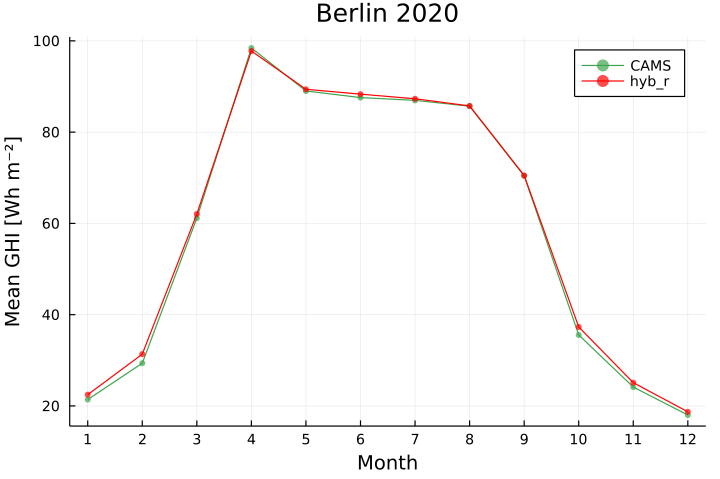

In [45]:
Fig. 12: Comparison of actual monthly GHI by CAMS (green) and predicted with a lead time of 15
minutes by the hybrid approach based on RMSE (red) for Berlin in 2020.

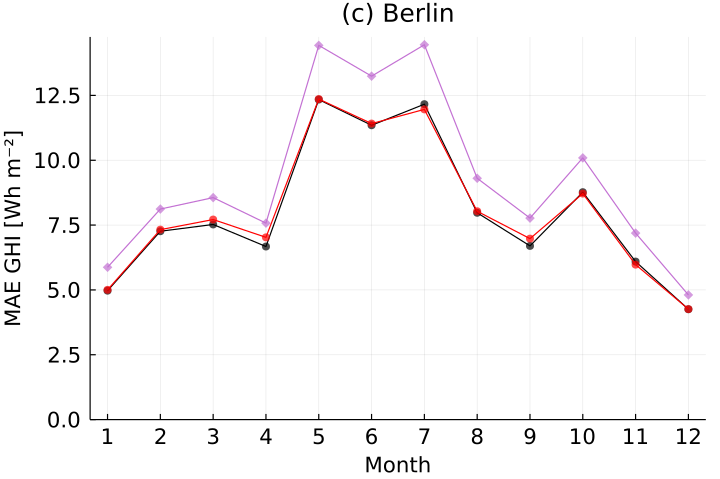

In [47]:
Fig. 13: MAE of 1 hour ahead GHI for the persistence and hybrid approaches in 2020 for Berlin.

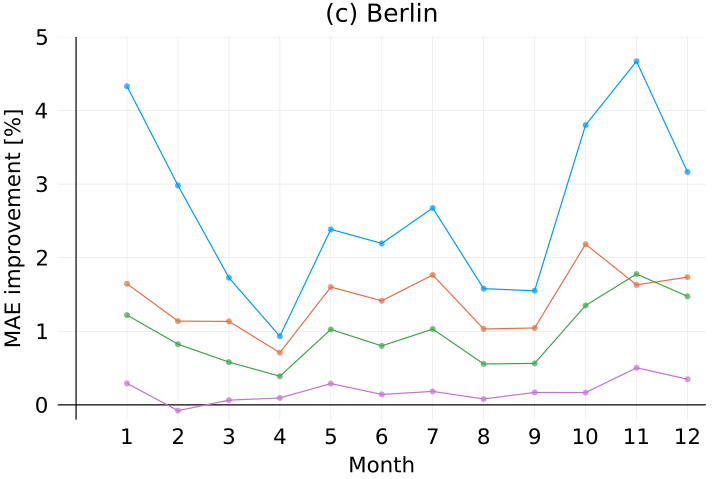

In [50]:
Fig. 14: Relative improvement of hybrid approach in 2020 for Berlin.

## Conclusions & outlook

- GHI prediction for Berlin: the reduction of monthly mean error amounts to 2.5 Wh m² and the relative improvement reaches nearly 5% compared with persistence

- advantage: straightforward model configuration does not require the input of other variables, such as wind speed

- trivial computational time required for prediction at one single site
- prospect to upscale the application to pan-European domain to build an efficient network for solar radiation nowcasting combining satellite based cloud information and/or ground measurements